##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1
)

datagen.fit(x_train)

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

modified_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

#The Functional API
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

# First Convolutional Block
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# Second Convolutional Block
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# Third Convolutional Block
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# Dense Layers
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10)(x)

# Build the model
swish_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print the model summary
swish_model.summary()


Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210,026 (820.41 KB)

 Trainable params: 210,026 (820.41 KB)

 Non-trainable params: 0 (0.00 B)

- `tf.keras.models.Sequential([])`: Це модель послідовного типу, де шари додаються один за одним. Цей підхід підходить для простих архітектур, де дані проходять через кожен шар тільки один раз, послідовно.

- `tf.keras.layers.Flatten(input_shape=(28, 28))`: Перший шар перетворює вхідні двовимірні дані розміром 28x28 (наприклад, зображення) у вектор. Це потрібно для подальшої обробки нейронами у наступних шарах.

- `tf.keras.layers.Dense(256, activation='relu')`: Це повнозв'язний (Dense) шар з 256 нейронів, який використовує функцію активації ReLU (Rectified Linear Unit). ReLU допомагає моделі вчитися нелінійним залежностям.

- `tf.keras.layers.BatchNormalization()`: Шар нормалізації пакетів. Він допомагає прискорити навчання та стабілізувати його, зменшуючи коливання значень у мережі після кожного шару.

- `tf.keras.layers.Dropout(0.2)`: Шар Dropout, який випадково вимикає 20% нейронів під час навчання, щоб уникнути перенавчання (overfitting) моделі.

- `tf.keras.layers.Dense(128, activation='relu')`: Ще один повнозв'язний шар, але цього разу з 128 нейронами. Він також використовує ReLU для нелінійності.

- `tf.keras.layers.BatchNormalization()`: Нормалізація пакетів для стабілізації та прискорення навчання.

- `tf.keras.layers.Dropout(0.2)`: Dropout ще раз вимикає 20% нейронів для запобігання перенавчанню.

- `tf.keras.layers.Dense(10)`: Останній повнозв'язний шар з 10 нейронами. Це вихідний шар, де кожен нейрон відповідає за одну з 10 можливих категорій (класів) для класифікації (наприклад, розпізнавання цифр 0-9). На цьому шарі немає активаційної функції, оскільки на етапі навчання використовується softmax для отримання ймовірностей для кожного класу.

- `swish`: більш плавна функція активації, яка не обнуляє від'ємні значення, а модифікує їх, роблячи перетворення більш м'яким. Це дозволяє нейронам залишатися активними навіть для негативних значень, що сприяє більш глибокому навчанню.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.8903446 ,  0.3918934 ,  0.09620495, -1.7725949 , -0.8969641 ,
        -0.17694032, -0.51628304, -0.7315246 ,  0.5523123 ,  0.2568404 ]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class

`tf.nn.softmax(predictions)`: Softmax перетворює необроблені логіти на ймовірності, де кожне значення відображає ймовірність того, що дане зображення належить до відповідного класу (цифри 0-9).

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.04821174, 0.17378876, 0.12930219, 0.01995245, 0.04789365,
        0.09839666, 0.07008186, 0.05651028, 0.20402846, 0.15183397]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

1.8849678

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

modified_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

swish_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

`optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)`:

- Adam (Adaptive Moment Estimation) — один із найпопулярніших оптимізаторів для навчання нейронних мереж. Він поєднує переваги двох інших методів оптимізації: AdaGrad і RMSProp.
- `learning_rate=0.001`: Це швидкість навчання, яка контролює, як швидко модель оновлює свої ваги під час градієнтного спуску. Значення 0.001 є стандартним вибором і добре підходить для багатьох задач.

`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`:

- SparseCategoricalCrossentropy: Це функція втрат для задач класифікації, де вихідні дані є категоріями, закодованими цілими числами. Наприклад, для класифікації зображень MNIST клас може бути представлений числом від 0 до 9.
- `from_logits=True`: Оскільки модель повертає логіти (необроблені виходи), а не ймовірності (які можна отримати через softmax), параметр from_logits=True вказує, що на вході до функції втрат використовуються саме логіти.


## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss

`x_train`: Набір тренувальних даних. У цьому випадку це зображення з MNIST (розміром 28x28), які використовуються як вхідні дані для моделі.

`y_train`: Відповідні мітки класів (цифри від 0 до 9 для MNIST). Це цільові значення, з якими порівнюються передбачення моделі під час навчання.

`epochs=20`: Кількість епох (циклів) навчання. Модель пройде через весь набір тренувальних даних 20 разів, кожного разу коригуючи свої ваги на основі результатів. Чим більше епох, тим більше шансів, що модель краще навчатиметься, але це також може призвести до перенавчання, якщо кількість епох занадто велика.

In [ ]:
checkpoint_1 = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model_checkpoint_1.keras',  # шлях для першої моделі
        save_weights_only=False,  # зберігати всю модель (структуру + ваги)
        save_best_only=True,  # зберігати тільки найкращу модель
        monitor='val_loss',  # стежити за валідаційною втратою
        mode='min',  # зберігати, якщо втрата зменшується
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.00001
    )
]


checkpoint_2 = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model_checkpoint_2.keras',
        save_weights_only=False,
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.00001
    )
]

checkpoint_3 = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model_checkpoint_3.keras',
        save_weights_only=False,
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.00001
    )
]

In [ ]:
history_1 = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint_1], verbose=1, batch_size=64, validation_split=0.2)

history_2 = modified_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint_2], verbose=1, batch_size=64, validation_split=0.2)

history_3 = swish_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint_3], verbose=1, validation_split=0.2)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7110 - loss: 0.8352
Epoch 1: val_loss improved from inf to 0.47652, saving model to model_checkpoint_1.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7111 - loss: 0.8349 - val_accuracy: 0.8281 - val_loss: 0.4765 - learning_rate: 0.0100
Epoch 2/10
909/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8355 - loss: 0.4594
Epoch 2: val_loss improved from 0.47652 to 0.42415, saving model to model_checkpoint_1.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8356 - loss: 0.4590 - val_accuracy: 0.8471 - val_loss: 0.4241 - learning_rate: 0.0100
Epoch 3/10
927/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.4154
Epoch 3: val_loss improved from 0.42415 to 0.41048, saving model to model_checkpoint_1.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8494 - loss: 0.4153 - val_accuracy: 0.8551 - val_loss: 0.4105 - learning_rate: 0.0100
Epoch 4/10
920/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2

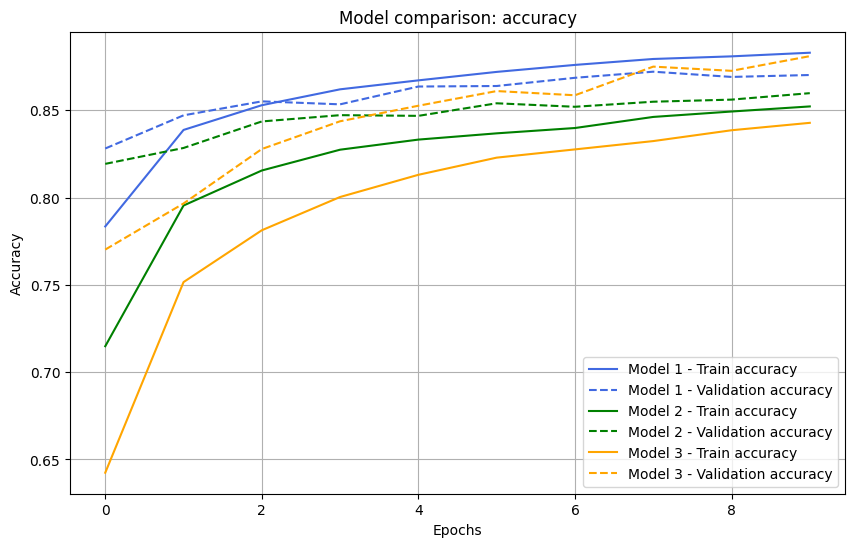

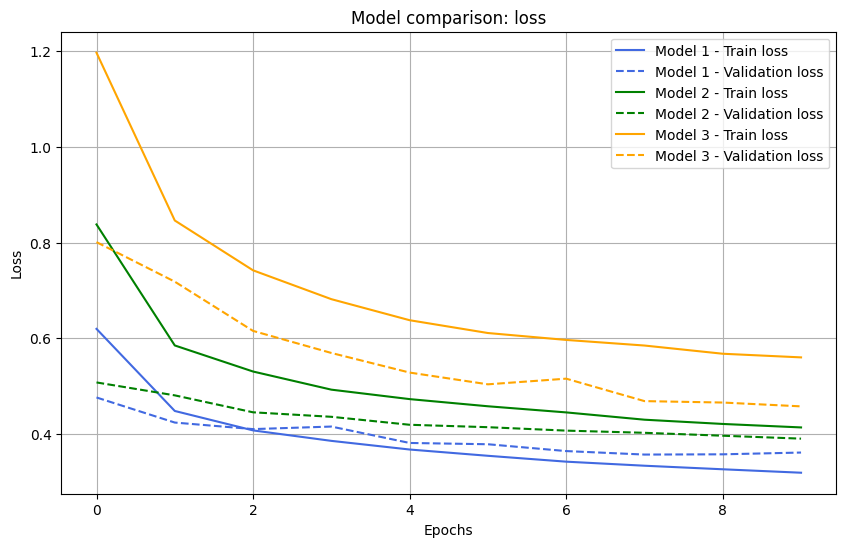

In [ ]:
def plot_comparison(histories, key='accuracy'):
    plt.figure(figsize=(10, 6))

    colors = ['royalblue', 'green', 'orange']
    for i, history in enumerate(histories):
        plt.plot(history.history[key], color=colors[i], label=f'Model {i+1} - Train {key}', linestyle='-')
        plt.plot(history.history['val_' + key], color=colors[i], label=f'Model {i+1} - Validation {key}', linestyle='--')

    plt.title(f'Model comparison: {key}')
    plt.xlabel('Epochs')
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_comparison([history_1, history_2, history_3], key='accuracy')

plot_comparison([history_1, history_2, history_3], key='loss')


In [ ]:
history_1 = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint_1], verbose=1)

history_2 = modified_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint_2], verbose=1)

history_3 = swish_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint_3], verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.3445
Epoch 1: val_loss did not improve from 0.35733
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8754 - loss: 0.3445 - val_accuracy: 0.8645 - val_loss: 0.3692 - learning_rate: 0.0100
Epoch 2/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8725 - loss: 0.3436
Epoch 2: val_loss did not improve from 0.35733
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8725 - loss: 0.3436 - val_accuracy: 0.8693 - val_loss: 0.3773 - learning_rate: 0.0100
Epoch 3/10
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8812 - loss: 0.3274
Epoch 3: val_loss improved from 0.35733 to 0.35728, saving model to model_checkpoint_1.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8812 - loss: 0.3274 - val_accuracy: 0.8702 - val_loss: 0.3573 - learning_rate: 0.0100
Epoch 4/10
1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8838 - loss: 0.3226
Epoch 4: val_loss improved from 

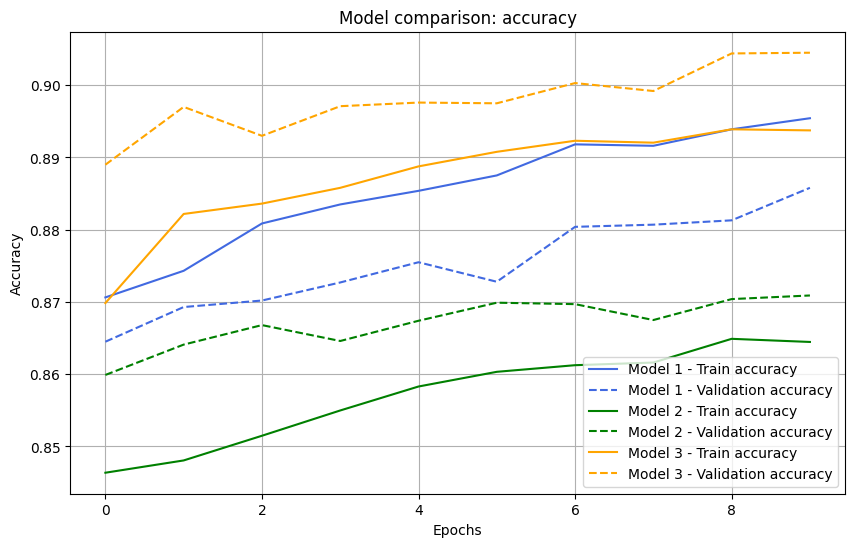

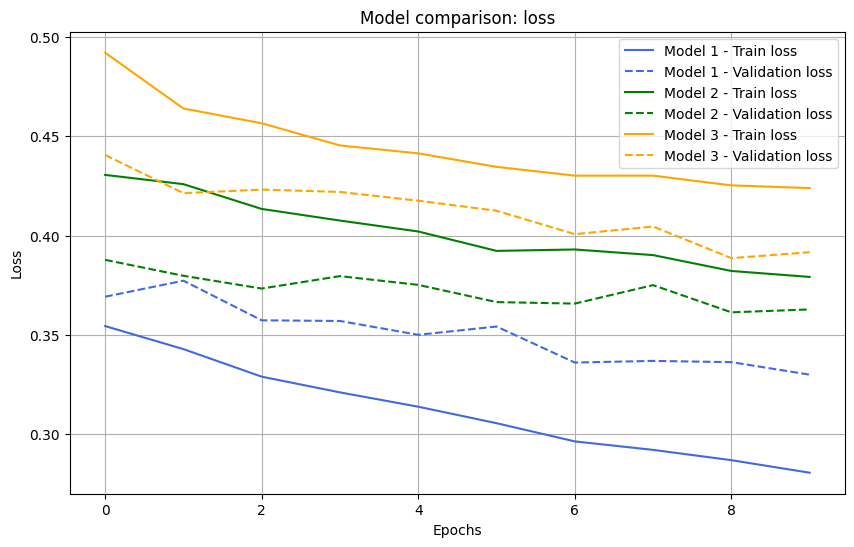

In [ ]:
plot_comparison([history_1, history_2, history_3], key='accuracy')

plot_comparison([history_1, history_2, history_3], key='loss')


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

`verbose=2` показує короткий звіт для кожної епохи з мінімальною кількістю деталей.

In [ ]:
# Збереження моделей
model.save('model.keras')
modified_model.save('modified_model.keras')
swish_model.save('swish_model.keras')

In [ ]:
# Завантаження моделей
loaded_model = tf.keras.models.load_model('model.keras')
loaded_modified_model = tf.keras.models.load_model('modified_model.keras')
loaded_swish_model = tf.keras.models.load_model('swish_model.keras')


In [ ]:
# Оцінка завантаженої моделі
loaded_model.evaluate(x_test, y_test, verbose=2)
loaded_modified_model.evaluate(x_test, y_test, verbose=2)
loaded_swish_model.evaluate(x_test, y_test, verbose=2)


313/313 - 1s - 5ms/step - accuracy: 0.8858 - loss: 0.3299
313/313 - 1s - 4ms/step - accuracy: 0.8709 - loss: 0.3628
313/313 - 2s - 6ms/step - accuracy: 0.9045 - loss: 0.3916


[0.3916170001029968, 0.9045000076293945]

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)
modified_model.evaluate(x_test,  y_test, verbose=2)
swish_model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.8858 - loss: 0.3299
313/313 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.3628
313/313 - 1s - 2ms/step - accuracy: 0.9045 - loss: 0.3916


[0.3916170299053192, 0.9045000076293945]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


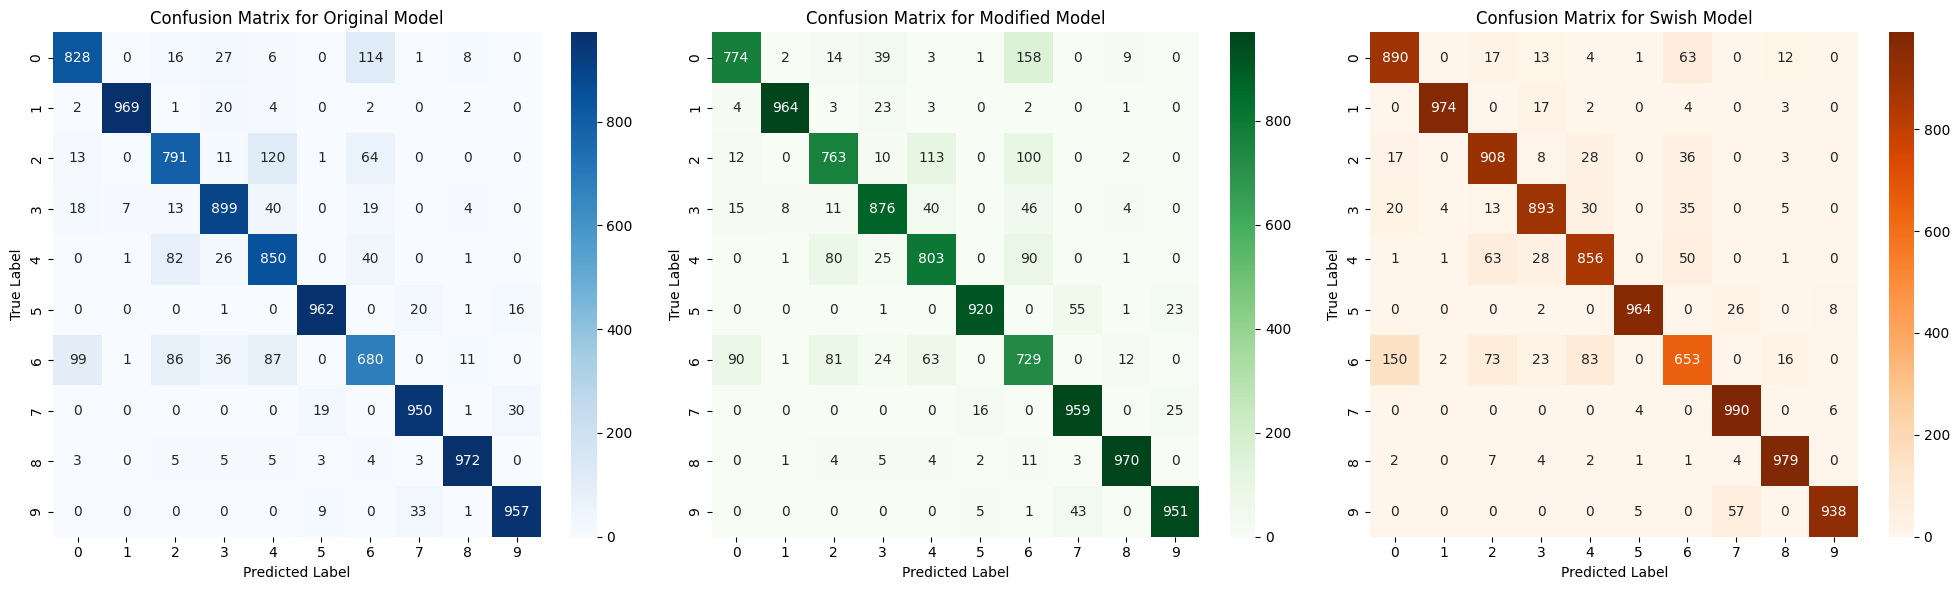

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_1 = np.argmax(model.predict(x_test), axis=1)
y_pred_2 = np.argmax(modified_model.predict(x_test), axis=1)
y_pred_3 = np.argmax(swish_model.predict(x_test), axis=1)

conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

def plot_confusion_matrices(conf_matrices, titles, color_maps):
    plt.figure(figsize=(20, 6))

    for i, (conf_matrix, title, cmap) in enumerate(zip(conf_matrices, titles, color_maps)):
        plt.subplot(1, 3, i + 1)  # 1 row, 3 columns
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap,
                    xticklabels=np.arange(10), yticklabels=np.arange(10))
        plt.title(title)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(
    [conf_matrix_1, conf_matrix_2, conf_matrix_3],
    ['Confusion Matrix for Original Model',
     'Confusion Matrix for Modified Model',
     'Confusion Matrix for Swish Model'],
    ['Blues', 'Greens', 'Oranges']
)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


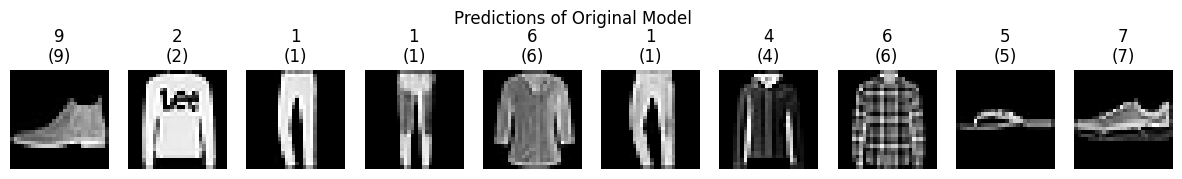

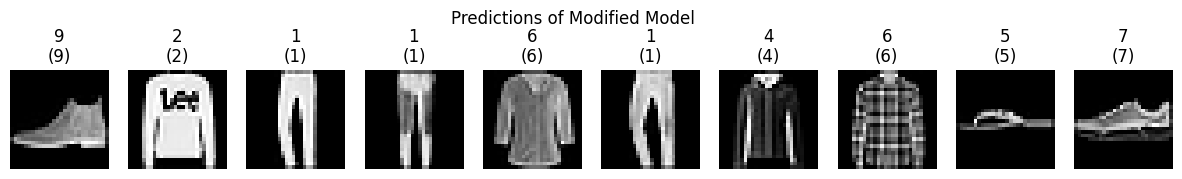

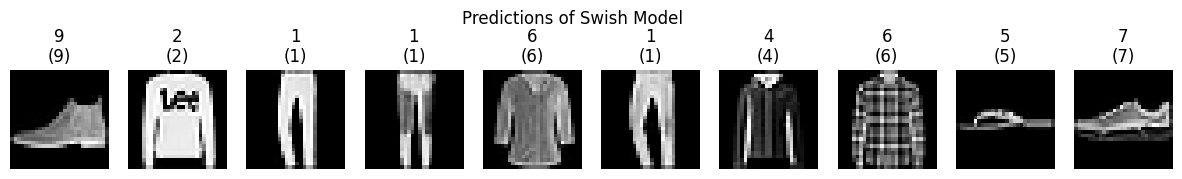

In [ ]:
predictions_model = model.predict(x_test)
predictions_modified_model = modified_model.predict(x_test)
predictions_swish_model = swish_model.predict(x_test)

def plot_predictions(x_test, y_test, predictions, model_name):
    plt.figure(figsize=(15, 4))

    # Display the first 10 test images with predictions
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(x_test[i], cmap='gray')
        plt.title(f'{np.argmax(predictions[i])}\n({y_test[i]})')
        plt.axis('off')

    plt.suptitle(f'Predictions of {model_name}')
    plt.show()

plot_predictions(x_test, y_test, predictions_model, 'Original Model')
plot_predictions(x_test, y_test, predictions_modified_model, 'Modified Model')
plot_predictions(x_test, y_test, predictions_swish_model, 'Swish Model')


## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
